# HW1

**NAME :** X.O.mto<br>
**HW # :** 1<br>
**REPO:** *https://github.com/Somto-Dera/ECGR5090-Machine-Learning*<br>

**In this homework, we will use US Housing dataset. You will develop linear regression with gradient decent algorithm to estimate the price of the house. In this homework, we will use 70% and 30% split between training and evaluation (test) sets across all problems. (Note: You cannot use the built-in function from ML libraries for gradient descent, you must implement it yourself. However, you can use built-in function for normalization/standardization).**

####  PROBLEM 1:  <br>
#### A
- Develop a gradient decent training and evaluation code that predicts housing price based on the following input variables; area, bedrooms, bathrooms, stories, parking.
- Identify the best parameters for your linear regression model, based on the above input variables.
- Plot the training and validation losses (in a single graph, but two different lines). For the learning rate, explore different values between 0.1 and 0.01 (your choice).
- Initialize your parameters (thetas to zero) and for the training iteration, choose what you believe fits the best.

#### B
- Develop a gradient decent training and evaluation code that predicts housing price based on the following input variables; area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea.
- Identify the best parameters for your linear regression model, based on the above input variables.
- Plot the training and validation losses (in a single graph, but two different lines) over your training iteration.
- Compare your linear regression model against problem 1 a. For the learning rate, explore different values between 0.1 and 0.01 (your choice).
- Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best.

________________________________________________________________________________________________________________

________________________________________________________________________________________________________________

**STEPS**
<br>
* Import Needed libraries

* Function Definition
    * Define cost function
    * Define gradient function

* Data Preparation
    * Load and understand data
    * Perform minor EDA

* Problem 2.A: Linear Regression Model(NormStandard)
    * Split the data into X and y
    * Split the data into training and test data set
    * Scale train and test set
    * Build the linear regression model
    * Evaluate the model
    * Plot a convergence of gradient descent graph with cost history
    * Plot a graph showing the effect of changing the learning rate in convergence of the gradient descent with cost history
    * Test linear regression model test dataset
    * Evaluate results   
        
* Problem 2.B: Linear Regression Model(NormStandard)
    * Use one hot encoding to convert non number data to binary
    * Split the data into X and y
    * Split the data into training and test data set
    * Scale train and test set
    * Build the linear regression model
    * Evaluate the model
    * Plot a convergence of gradient descent graph with cost history
    * Plot a graph showing the effect of changing the learning rate in convergence of the gradient descent with cost history
    * Test linear regression model test dataset
    * Evaluate results

________________________________________________________________________________________________________________

________________________________________________________________________________________________________________

In [1]:
# import the needed libraries
import numpy as np          # for array and matrics manipulation
import pandas as pd          # for data manipulation and analysis
import matplotlib.pyplot as plt          # for data visualisation
from sklearn.model_selection import train_test_split          # to split data sets
from sklearn.compose import ColumnTransformer          # to apply transformers to columns of an array or pandas DataFrame
from sklearn.preprocessing import OneHotEncoder          # for onehot encoding

________________________________________________________________________________________________________________

**Details on *comp_cost* function for the linear regression**.<br>

- the hypotheis function is h(θ,x)= θ_0 + θ_1 * x_1 + ... + θ_n * x_n

<br>**Input Parameters**
- *'X' :* 2D array where each row represent the training example and each column represent the feature ndarray
- *'y' :* 1D array of labels/target value for each traing example. dimension(1 x m)
- *'theta' :* 1D array of fitting parameters or weights. Dimension (1 x n)

<br>**Dimension(m x n)**
- *'m' :* number of training examples
- *'n' :* number of features (including X_0 column of ones)

<br>**Output Parameters**
- *'J' :* scalar value

<br>**Library Functions Used**
- *numpy.dot()* returns the product of two arrays
- *numpy.subtract()* performs vector entree subtraction
- *numpy.square()* performs the vector entree square

In [2]:
def comp_cost(X, y, theta, flag):
    
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    
    if flag == "simple regr":
        J = 1 / (2 * m) * np.sum(sqrErrors)
        
    if flag == "onehot regr":
        J = 1 / (2 * m) * errors.T.dot(errors)
    
    return J

**Details on *gradient_descent* function**
- a for loop i used to compute theta using batch gradient descent algorithm
- each value theta value is used to compute cost.Result is stored in a list
- cost should decrease with every iteration
- returns new theta and cost history variable

<br>**Input Parameters**
- *'X' :* 2D array where each row represent the training example and each column represent the feature ndarray
- *'y' :* 1D array of labels/target value for each traing example. dimension(1 x m)
- *'theta' :* 1D array of fitting parameters or weights. Dimension (1 x n)
- *'alpha' :* Learning rate. Scalar value
- *'iterations':* No of iterations. Scalar value. 

<br>**Dimension(m x n)**
- *'m' :* number of training examples
- *'n' :* number of features (including X_0 column of ones)

<br>**Output Parameters**
- *'theta' :*  Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
- *'cost_history' :* Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)

<br>**Library Functions Used**
- *numpy.dot()* returns the product of two arrays
- *numpy.subtract()* performs vector entree subtraction
- *numpy.transpose()* reverse or permute the axes of an array

In [3]:
def gradient_descent(X, y, theta, alpha, iterations, flag):
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        
        cost_history[i] = comp_cost(X, y, theta, flag)
        
    return theta, cost_history

________________________________________________________________________________________________________________

________________________________________________________________________________________________________________

In [4]:
# load dataset
housing = pd.read_csv('Housing.csv')          # load dataset
housing.head()          # output first 5 rows from the dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


* It contains 13 columns, the 11 columns are explanatory variables x1, ..., x10; and the final/fourth column is the dependent variable y. It has 545 data-value per datapoint(column).

In [5]:
dataset = housing
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
dataset.shape

(545, 13)

In [7]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
# drop columns not used for the training
dataset = dataset.drop(['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], axis='columns')
dataset.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [10]:
# split dataset into test(0.3) and train(0.7)
np.random.seed(0)
dataset_train, dataset_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 1)
dataset_train.shape

(381, 6)

In [11]:
dataset_test.shape

(164, 6)

In [12]:
x_train = dataset_train.values[:, 1:6]          # get input values from 2nd to 6th column
y_train = dataset_train.values[:, 0]          # get output values from first column
m = len(y_train)          # Number of training examples
temp_m = len(x_train)
assert (m == temp_m)

Text(0.5, 1.0, 'SCATTER PLOT OF TRAINING DATA')

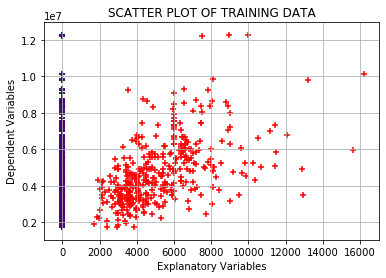

In [13]:
# plot a scatter graph of dataset
plt.scatter(dataset_train.values[:, 1],y_train, color='red',marker= '+')
plt.scatter(dataset_train.values[:, 2],y_train, color='yellow',marker= '+')
plt.scatter(dataset_train.values[:, 3],y_train, color='blue',marker= '+')
plt.scatter(dataset_train.values[:, 4],y_train, color='green',marker= '+')
plt.scatter(dataset_train.values[:, 5],y_train, color='indigo',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (12,8)
plt.xlabel('Explanatory Variables')
plt.ylabel('Dependent Variables')
plt.title('SCATTER PLOT OF TRAINING DATA')

In [14]:
# hstack() function from numpy is used  to add column of ones to X feature 
# this is the final X matrix (feature matrix)
x_train = np.hstack((np.ones((m,1)), x_train))

#Initialise theta to zero as recommended by the hw question
init_theta = np.zeros(6)

# declare and assign values to the gradient descent learning parameters alpha and no of iterations
iterations = 1000          # number of iterations
#alpha = 0.0000000004
#iterations = 800

/tmp/ipykernel_6435/23864029.py:5: RuntimeWarning: overflow encountered in square
  sqrErrors = np.square(errors)
/tmp/ipykernel_6435/4142777044.py:8: RuntimeWarning: invalid value encountered in subtract
  theta = theta - sum_delta;
/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


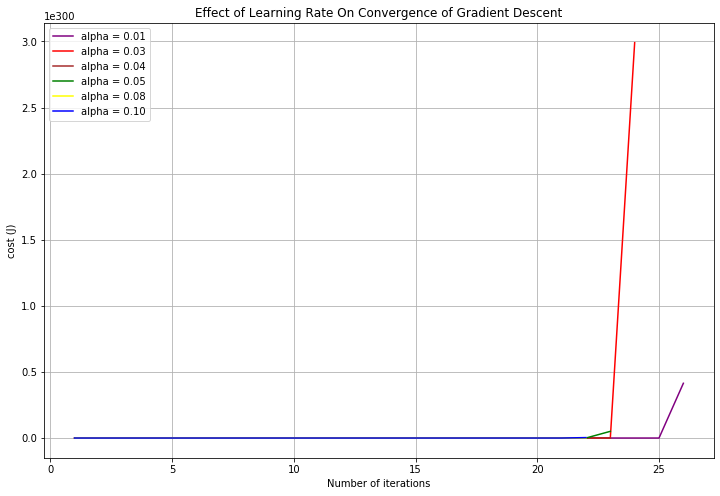

In [15]:
alpha_list = [0.01, 0.03, 0.04, 0.05, 0.07, 0.09]          # list of alpha variables to use
label_list = ['alpha = 0.01', 'alpha = 0.03',  'alpha = 0.04', 'alpha = 0.05', 'alpha = 0.08', 'alpha = 0.10']
color = ['purple', 'red', 'brown', 'green', 'yellow', 'blue']
i = 0          # alpha list index counter
flag = 'simple regr'

for alpha in alpha_list:
    
    optimal_theta, cost_history = gradient_descent(x_train, y_train, init_theta, alpha, iterations, flag)
    
    plt.plot(range(1, iterations +1), cost_history, color[i], label= label_list[i])
    
    plt.rcParams["figure.figsize"] = (10,6)
    plt.grid()
    plt.xlabel("Number of iterations")
    plt.ylabel("cost (J)")
    plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
    plt.legend()
    i += 1
    
plt.grid()

In [16]:
optimal_alpha = 0.03
optimal_theta, cost_history = gradient_descent(x_train, y_train, init_theta, optimal_alpha, iterations, flag)

print('Final value of train theta: ', optimal_theta)
print('First 5 values from cost_history: ', cost_history[: 5])
print('Last 5 values from cost_history: ', cost_history[-5:])

Final value of train theta:  [nan nan nan nan nan nan]
First 5 values from cost_history:  [1.07243704e+25 1.01451525e+37 9.59721795e+48 9.07887702e+60
 8.58853144e+72]
Last 5 values from cost_history:  [nan nan nan nan nan]


/tmp/ipykernel_6435/23864029.py:5: RuntimeWarning: overflow encountered in square
  sqrErrors = np.square(errors)


Text(0.5, 1.0, 'Convergence of gradient descent for train model (alpha = 0.03)')

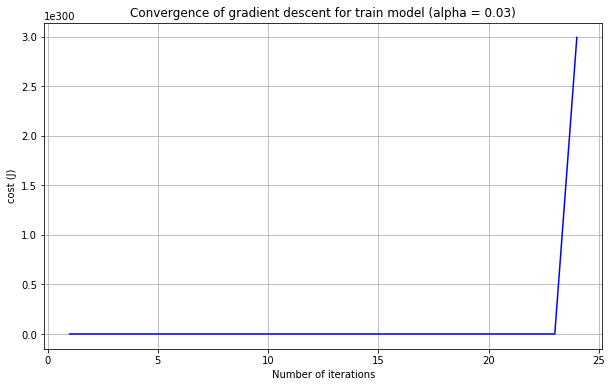

In [17]:
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent for train model (alpha = 0.03)")

________________________________________________________________________________________________________________

In [18]:
x_test = dataset_test.values[:, 1:6]          # get input values from 2nd to 6th column
y_test = dataset_test.values[:, 0]          # get output values from first column
m = len(y_test)          # Number of training examples
temp_m = len(x_test)
assert (m == temp_m)

In [19]:
x_test = np.hstack((np.ones((m,1)), x_test))
#prediction = x_test.dot(optimal_theta)
prediction = np.array(x_test).dot(optimal_theta)

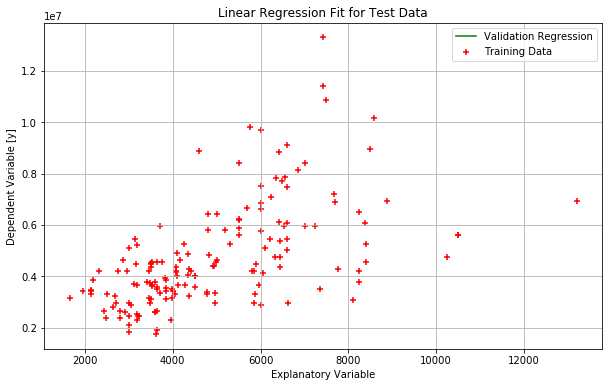

In [20]:
# plot test data 
plt.scatter(x_test[:,1], y_test, color='red', marker= '+', label= 'Training Data')
#plt.plot(x_test[:,1], y_test, color='blue', marker= '+', label= 'Training Data')
plt.plot(x_test[:,1],prediction, color='green', label='Validation Regression')
plt.rcParams['figure.figsize'] = (10,6)
plt.grid()
plt.xlabel('Explanatory Variable')
plt.ylabel('Dependent Variable [y]')
plt.title('Linear Regression Fit for Test Data')
plt.legend()

________________________________________________________________________________________________________________

________________________________________________________________________________________________________________

### PROBLEM 2-B

In [21]:
dataset = housing
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [22]:
dataset.basement.unique()

array(['no', 'yes'], dtype=object)

In [23]:
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for column in categorical_columns:
    tempdataset = pd.get_dummies(dataset[column], prefix=column)
    dataset = pd.merge(
        left=dataset,
        right=tempdataset,
        left_index=True,
        right_index=True,
    )
    dataset = dataset.drop(columns=column)
dataset.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,2,furnished,0,1,1,0,1,0,1,0,0,1,0,1
1,12250000,8960,4,4,4,3,furnished,0,1,1,0,1,0,1,0,0,1,1,0
2,12250000,9960,3,2,2,2,semi-furnished,0,1,1,0,0,1,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,furnished,0,1,1,0,0,1,1,0,0,1,0,1
4,11410000,7420,4,1,2,2,furnished,0,1,0,1,0,1,1,0,0,1,1,0


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                545 non-null    int64 
 1   area                 545 non-null    int64 
 2   bedrooms             545 non-null    int64 
 3   bathrooms            545 non-null    int64 
 4   stories              545 non-null    int64 
 5   parking              545 non-null    int64 
 6   furnishingstatus     545 non-null    object
 7   mainroad_no          545 non-null    uint8 
 8   mainroad_yes         545 non-null    uint8 
 9   guestroom_no         545 non-null    uint8 
 10  guestroom_yes        545 non-null    uint8 
 11  basement_no          545 non-null    uint8 
 12  basement_yes         545 non-null    uint8 
 13  hotwaterheating_no   545 non-null    uint8 
 14  hotwaterheating_yes  545 non-null    uint8 
 15  airconditioning_no   545 non-null    uint8 
 16  aircondi

In [25]:
dataset = dataset.drop(['furnishingstatus'], axis='columns')
dataset.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,0,1
1,12250000,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0
2,12250000,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,0,1
4,11410000,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0


In [26]:
np.random.seed(0)
dataset_train, dataset_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 1)
dataset_train.shape

(381, 18)

In [27]:
x_train = dataset_train.values[:, 1:18]          # get input values from first column
y_train = dataset_train.values[:, 0]          # get output values from second column
m = len(y_train)          # Number of training examples
temp_m = len(x_train)
assert (m == temp_m)

Text(0.5, 1.0, 'SCATTER PLOT OF TRAINING DATA')

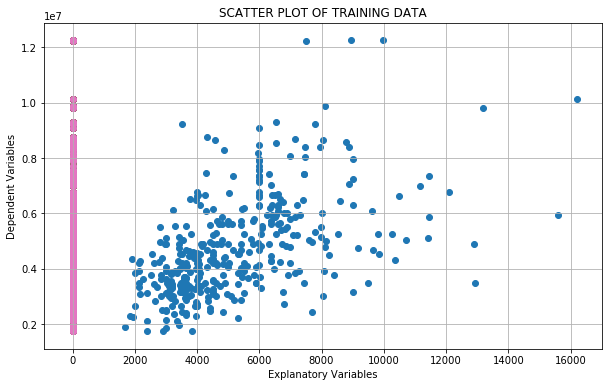

In [28]:
#plt.scatter(dataset_train.values[:, 1],y_train, color='red',marker= '+')
#plt.scatter(dataset_train.values[:, 2],y_train, color='yellow',marker= '+')
#plt.scatter(dataset_train.values[:, 3],y_train, color='blue',marker= '+')
#plt.scatter(dataset_train.values[:, 4],y_train, color='green',marker= '+')
#plt.scatter(dataset_train.values[:, 5],y_train, color='indigo',marker= '+')

for var in range(1,18):
    plt.scatter(dataset_train.values[:, var],y_train)
    plt.rcParams['figure.figsize'] = (12,8)
    
plt.grid()
plt.xlabel('Explanatory Variables')
plt.ylabel('Dependent Variables')
plt.title('SCATTER PLOT OF TRAINING DATA')

In [29]:
# Lets use hstack() function from numpy to add column of ones to X feature 
# This will be our final X matrix (feature matrix)
X_train = np.hstack((np.ones((m,1)), x_train))
X_train.shape

#Initialise theta to zero as recommended by the hw question
init_theta = np.zeros(18)

# declare and assign values to the gradient descent learning parameters alpha and no of iterations
#alpha = 0.0000000004
#iterations = 800
#alpha = 0.04
iterations = 1000

In [30]:
X_train.shape

(381, 18)

/tmp/ipykernel_6435/23864029.py:5: RuntimeWarning: overflow encountered in square
  sqrErrors = np.square(errors)
/tmp/ipykernel_6435/4142777044.py:8: RuntimeWarning: invalid value encountered in subtract
  theta = theta - sum_delta;


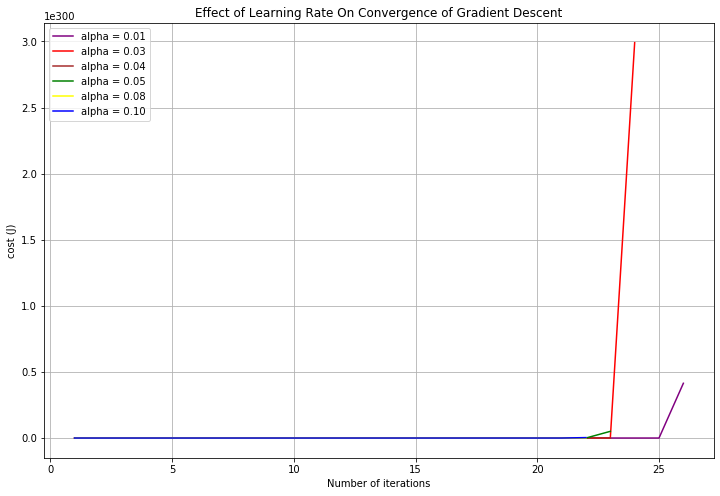

In [31]:
alpha_list = [0.01, 0.03, 0.04, 0.05, 0.07, 0.09]          # list of alpha variables to use
label_list = ['alpha = 0.01', 'alpha = 0.03',  'alpha = 0.04', 'alpha = 0.05', 'alpha = 0.08', 'alpha = 0.10']
color = ['purple', 'red', 'brown', 'green', 'yellow', 'blue']
i = 0          # alpha list index counter
flag = 'onehot regr'

for alpha in alpha_list:
    
    optimal_theta, cost_history = gradient_descent(X_train, y_train, init_theta, alpha, iterations, flag)
    
    plt.plot(range(1, iterations +1), cost_history, color[i], label= label_list[i])
    plt.rcParams["figure.figsize"] = (10,6)
    i += 1
    
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()

In [32]:
optimal_alpha = 0.03
optimal_theta, cost_history = gradient_descent(X_train, y_train, init_theta, optimal_alpha, iterations, flag)

print('Final value of train theta: ', optimal_theta)
print('First 5 values from cost_history: ', cost_history[: 5])
print('Last 5 values from cost_history: ', cost_history[-5:])

Final value of train theta:  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
First 5 values from cost_history:  [1.07243729e+25 1.01451570e+37 9.59722426e+48 9.07888493e+60
 8.58854075e+72]
Last 5 values from cost_history:  [nan nan nan nan nan]


/tmp/ipykernel_6435/23864029.py:5: RuntimeWarning: overflow encountered in square
  sqrErrors = np.square(errors)


Text(0.5, 1.0, 'Convergence of gradient descent for train model (alpha = 0.03)')

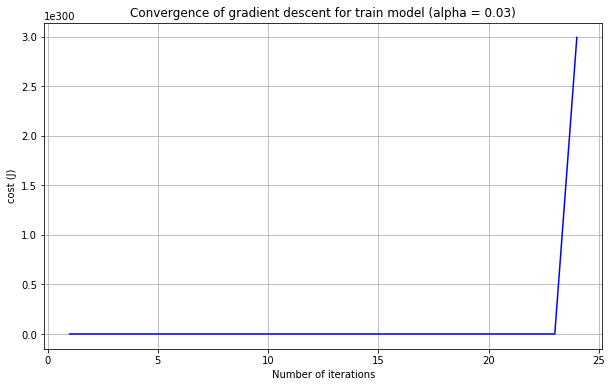

In [33]:
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent for train model (alpha = 0.03)")

In [34]:
x_test = dataset_test.values[:, 1:18]          # get input values from 2nd to 6th column
y_test = dataset_test.values[:, 0]          # get output values from first column
m = len(y_test)          # Number of training examples
temp_m = len(x_test)
assert (m == temp_m)

In [35]:
x_test = np.hstack((np.ones((m,1)), x_test))
#prediction = x_test.dot(optimal_theta)
prediction = np.array(x_test).dot(optimal_theta)
prediction

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan])

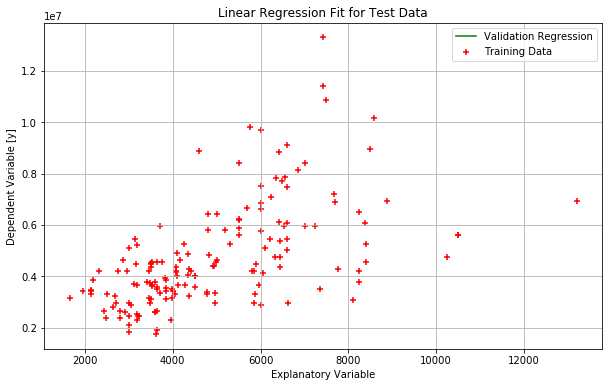

In [36]:
# plot test data 
plt.scatter(x_test[:,1], y_test, color='red', marker= '+', label= 'Training Data')
#plt.plot(x_test[:,1], y_test, color='blue', marker= '+', label= 'Training Data')
plt.plot(x_test[:,1],prediction, color='green', label='Validation Regression')
plt.rcParams['figure.figsize'] = (10,6)
plt.grid()
plt.xlabel('Explanatory Variable')
plt.ylabel('Dependent Variable [y]')
plt.title('Linear Regression Fit for Test Data')
plt.legend()